Quickstart Guide
================

This guides demonstrates the basic usage of DPsim as a [Python module](https://dpsim.fein-aachen.org/doc/development/sphinx/Python.html).

(Please note that DPsim also provides a [C++ API](https://dpsim.fein-aachen.org/doc/development/doxygen).)

The first simulation
--------------------

As a first simple, test we will simulate the following static network:

![](Figures/vs_line_load.svg)

The network consists of 4 nodes and 4 elements:

| Component | Type            | Python Class                              | Node A | Node B | Paramter |
| :---------| :----           | :---------------------------------------- | :----- | :----- | :------- |
| v_s       | Voltage Source  | `dpsim.dp.ph1.VoltageSource`       | 0      | GND    | 10 kV    |
| r_line    | Line Resistance | `dpsim.dp.ph1.Resistor`            | 0      | 1      | 1 Ohm    |
| l_line    | Line Inductance | `dpsim.dp.ph1.Inductor`            | 1      | 2      | 1 Henry  |
| r_load    | Load            | `dpsim.dp.ph1.Resistor`            | 2      | GND    | 1 kOhm   |

Before we can start, we must import the DPsim Python module.
We also add `dp` as an alias for the dynamic phasor components.

In [1]:
import dpsim

Next, we can define the model by creating a couple of components.
Each component is identified by a name which is passed as the first argument.
Following arguments are used to define the topology by assigning the component to a specific node / bus or to pass parameters.

In [2]:
# Nodes
gnd = dpsim.dp.Node.GND()
n0  = dpsim.dp.Node("n0")
n1  = dpsim.dp.Node("n1")
n2  = dpsim.dp.Node("n2")

v_s = dpsim.dp.ph1.VoltageSource("v_s")
v_s.V_ref = 10000+0j
r_line = dpsim.dp.ph1.Resistor("r_line")
r_line.R = 1
l_line = dpsim.dp.ph1.Inductor("l_line")
l_line.L = 1
r_load = dpsim.dp.ph1.Resistor("r_load")
r_load.R = 1000

# Connections 
v_s.connect([n0, gnd])
r_line.connect([n0, n1])
l_line.connect([n1, n2])
r_load.connect([n2, gnd])

Next, we have to create a simulation object:

In [3]:
sys = dpsim.SystemTopology(50, [ n0, n1, n2 ], [ v_s, r_line, l_line, r_load ])

We can also visualize the system topology:

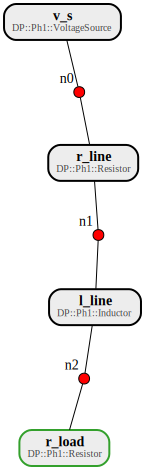

In [4]:
sys

Finally, we can start the simulation and wait for its completion:

In [5]:
sim = dpsim.Simulation("Example1", sys, timestep = 1e-4, duration = 0.03, pbar = True)

log = dpsim.Logger("Example1")
for n in sys.nodes:
    log.log_attribute(sys.nodes[n], "v")

sim.add_logger(log)
    
await sim.simulate()

HTML(value='Simulation start is pending...')

FloatProgress(value=0.0, max=0.03)

Results can be analyzed and plotted by the `villas.dataprocessing` package:

column number: 3
results length: 301
real column names: []
complex column names: ['n0.v', 'n1.v', 'n2.v']


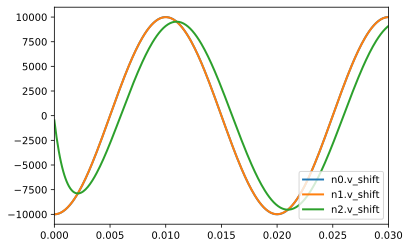

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (6.0, 4.0), 'figure.facecolor': 'white', 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white'}

import matplotlib.pyplot as plt
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.timeseries as ts

results     = rt.read_timeseries_dpsim('logs/Example1.csv')
results_emt = [ results[series].frequency_shift(freq=50) for series in results ]

for series in results_emt:
    pt.plot_timeseries('Results EMT', series)

plt.show()

In [7]:
!cat logs/Example1_Solver.log